In [1]:
# It is time to do Sentimental and Topic Analysis before finding our micro_influencer.
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
Adidas_tweets_data=pd.read_csv("Adidas_tweets_data.csv")

In [3]:
Adidas_tweets_data

author_id           author_name      screen_name  verification  \
0     1.322300e+18                 Chris         Gattsu98         False   
1     9.841440e+17            nFt-Offers      khosrozadeh         False   
2     2.360121e+09         Fat Kid Deals      FatKidDeals          True   
3     9.749410e+17  #R35RevampedCVs🔥 🔥 🔥  _NtokozoMtshali         False   
4     3.583472e+08         D E A N D R E      Drethedude_         False   
...            ...                   ...              ...           ...   
5176  1.473670e+18          LeviWang.eth      wangzineng1         False   
5177  1.458720e+18             kordodovi        kordodovi         False   
5178  8.482373e+07            Beth Perry        Beth_Brfc         False   
5179  1.458720e+18             kordodovi        kordodovi         False   
5180  1.458720e+18             kordodovi        kordodovi         False   

                                            description  \
0                               @NUFC. CS & R6 enjoyer.   
1                                                   NaN   
2     Finding the best deals on the internet. Offici...   
3           I'm meant for more than what you call life.   
4     Trust God | Houston vs Everybody | Hustle and ...   
...                                                 ...   
5176                       @ALPACADABRAZ\r\n@get_turned   
5177  Cyber Galz Toxic Skulls Club(#792, #793) Toxic...   
5178                                         #WeGoAgain   
5179  Cyber Galz Toxic Skulls Club(#792, #793) Toxic...   
5180  Cyber Galz Toxic Skulls Club(#792, #793) Toxic...   

                            location  followers_count  friends_count  \
0     Newcastle Upon Tyne, England.                87            175   
1                                usa                6             45   
2              promo@fatkiddeals.com           609358              3   
3           Somewhere loving my kids              601            686   
4                     Houston, TX 🤘🏽             2839           1530   
...                              ...              ...            ...   
5176                             NaN              261            268   
5177                             NaN               83            394   
5178                       Blackburn              526           1918   
5179                             NaN               83            394   
5180                             NaN               83            394   

      listed_count  favourites_count  statuses_count  author_lang  \
0                1               108             308          NaN   
1                0                26              48          NaN   
2             2760             65447         1070222          NaN   
3                1              1752            2249          NaN   
4                4              5229          157330          NaN   
...            ...               ...             ...          ...   
5176             3               205             325          NaN   
5177             5               569             914          NaN   
5178             5             35488           23600          NaN   
5179             5               569             914          NaN   
5180             5               569             914          NaN   

                     created_at  \
0     2022-04-29 15:14:19+00:00   
1     2022-04-29 15:14:19+00:00   
2     2022-04-29 15:14:03+00:00   
3     2022-04-29 15:13:58+00:00   
4     2022-04-29 15:13:31+00:00   
...                         ...   
5176  2022-04-28 07:58:41+00:00   
5177  2022-04-28 07:57:07+00:00   
5178  2022-04-28 07:57:05+00:00   
5179  2022-04-28 07:56:54+00:00   
5180  2022-04-28 07:56:36+00:00   

                                                   text  retweet_count  \
0     @ToonMouthTyne I hope we get Nike or Adidas tb...              0   
1     After joining the #BoredApeYachtClub , #Adidas...              0   
2     adidas Women's Running Shoes for $29.49! (Reta...       

In [4]:
Adidas_tweets_data.drop_duplicates()

author_id           author_name      screen_name  verification  \
0     1.322300e+18                 Chris         Gattsu98         False   
1     9.841440e+17            nFt-Offers      khosrozadeh         False   
2     2.360121e+09         Fat Kid Deals      FatKidDeals          True   
3     9.749410e+17  #R35RevampedCVs🔥 🔥 🔥  _NtokozoMtshali         False   
4     3.583472e+08         D E A N D R E      Drethedude_         False   
...            ...                   ...              ...           ...   
5176  1.473670e+18          LeviWang.eth      wangzineng1         False   
5177  1.458720e+18             kordodovi        kordodovi         False   
5178  8.482373e+07            Beth Perry        Beth_Brfc         False   
5179  1.458720e+18             kordodovi        kordodovi         False   
5180  1.458720e+18             kordodovi        kordodovi         False   

                                            description  \
0                               @NUFC. CS & R6 enjoyer.   
1                                                   NaN   
2     Finding the best deals on the internet. Offici...   
3           I'm meant for more than what you call life.   
4     Trust God | Houston vs Everybody | Hustle and ...   
...                                                 ...   
5176                       @ALPACADABRAZ\r\n@get_turned   
5177  Cyber Galz Toxic Skulls Club(#792, #793) Toxic...   
5178                                         #WeGoAgain   
5179  Cyber Galz Toxic Skulls Club(#792, #793) Toxic...   
5180  Cyber Galz Toxic Skulls Club(#792, #793) Toxic...   

                            location  followers_count  friends_count  \
0     Newcastle Upon Tyne, England.                87            175   
1                                usa                6             45   
2              promo@fatkiddeals.com           609358              3   
3           Somewhere loving my kids              601            686   
4                     Houston, TX 🤘🏽             2839           1530   
...                              ...              ...            ...   
5176                             NaN              261            268   
5177                             NaN               83            394   
5178                       Blackburn              526           1918   
5179                             NaN               83            394   
5180                             NaN               83            394   

      listed_count  favourites_count  statuses_count  author_lang  \
0                1               108             308          NaN   
1                0                26              48          NaN   
2             2760             65447         1070222          NaN   
3                1              1752            2249          NaN   
4                4              5229          157330          NaN   
...            ...               ...             ...          ...   
5176             3               205             325          NaN   
5177             5               569             914          NaN   
5178             5             35488           23600          NaN   
5179             5               569             914          NaN   
5180             5               569             914          NaN   

                     created_at  \
0     2022-04-29 15:14:19+00:00   
1     2022-04-29 15:14:19+00:00   
2     2022-04-29 15:14:03+00:00   
3     2022-04-29 15:13:58+00:00   
4     2022-04-29 15:13:31+00:00   
...                         ...   
5176  2022-04-28 07:58:41+00:00   
5177  2022-04-28 07:57:07+00:00   
5178  2022-04-28 07:57:05+00:00   
5179  2022-04-28 07:56:54+00:00   
5180  2022-04-28 07:56:36+00:00   

                                                   text  retweet_count  \
0     @ToonMouthTyne I hope we get Nike or Adidas tb...              0   
1     After joining the #BoredApeYachtClub , #Adidas...              0   
2     adidas Women's Running Shoes for $29.49! (Reta...       

In [5]:
print("Shpae of Adidas tweets for 28 & 29 April, 2022 is :", Adidas_tweets_data.shape)

Shpae of Adidas tweets for 28 & 29 April, 2022 is : (5181, 18)


In [6]:
Adidas_tweets_data.author_id.nunique()

4219

In [7]:
Adidas_tweets_data.isnull().sum(axis=0)

author_id                    0
author_name                  0
screen_name                  0
verification                 0
description                661
location                  1905
followers_count              0
friends_count                0
listed_count                 0
favourites_count             0
statuses_count               0
author_lang               5181
created_at                   0
text                         0
retweet_count                0
entities_get_hashtages       0
source                       0
fav_count                    0
dtype: int64

In [8]:
Adidas_df1=Adidas_tweets_data.copy()

In [9]:
# Dropping author_lang column because it consits of numm values: twitter did not provide author language information.
Adidas_df1=Adidas_df1.drop(columns='author_lang')

In [10]:
# See one column has already reduced.
Adidas_df1.shape

(5181, 17)

In [11]:
loc=Adidas_df1['location'].value_counts()

In [12]:
loc.head(10)

United States      46
Lagos, Nigeria     42
London, England    40
Ellicott City      34
New York, USA      32
United Kingdom     31
London             29
USA                27
Metaverse          26
Los Angeles, CA    21
Name: location, dtype: int64

In [13]:
# Let's see top 100 influencers with respect to followers_count, irrescpetive of their postive or negative comments.
top_100=Adidas_df1.nlargest(100,'followers_count')

In [14]:
top_100.head(50)

author_id              author_name    screen_name  verification  \
984   3.974381e+07           Economic Times  EconomicTimes          True   
523   2.152686e+09         FC Bayern Munich     FCBayernEN          True   
3335  2.152686e+09         FC Bayern Munich     FCBayernEN          True   
4588  1.839291e+07  The Business of Fashion            BoF          True   
3678  2.170176e+07              GQ Magazine     GQMagazine          True   
4195  1.509757e+07               Nice Kicks      nicekicks          True   
3403  1.618087e+07             Sneaker News    SneakerNews         False   
4125  2.043436e+07           adidas Running  adidasrunning          True   
4130  2.043436e+07           adidas Running  adidasrunning          True   
4518  3.132459e+08                adidas_ES      adidas_ES          True   
2913  1.828650e+07                HYPEBEAST      HYPEBEAST          True   
3865  1.828650e+07                HYPEBEAST      HYPEBEAST          True   
1162  3.570637e+07                adidas UK       adidasUK          True   
4139  3.570637e+07                adidas UK       adidasUK          True   
4144  3.570637e+07                adidas UK       adidasUK          True   
93    2.698270e+09                SOLELINKS      SOLELINKS         False   
113   2.698270e+09                SOLELINKS      SOLELINKS         False   
116   2.698270e+09                SOLELINKS      SOLELINKS         False   
777   2.698270e+09                SOLELINKS      SOLELINKS         False   
67    2.698270e+09                SOLELINKS      SOLELINKS         False   
78    2.698270e+09                SOLELINKS      SOLELINKS         False   
1892  2.849964e+09              Leo Messi 🔟     WeAreMessi         False   
3378  1.938250e+07        SoleCollector.com  SoleCollector          True   
1355  2.360121e+09            Fat Kid Deals    FatKidDeals          True   
2     2.360121e+09            Fat Kid Deals    FatKidDeals          True   
3509  2.360121e+09            Fat Kid Deals    FatKidDeals          True   
3969  2.360121e+09            Fat Kid Deals    FatKidDeals          True   
4316  2.360121e+09            Fat Kid Deals    FatKidDeals          True   
2633  1.494697e+07            Champs Sports   champssports          True   
2676  5.303666e+07     GLAMOUR South Africa     GLAMOUR_sa         False   
616   5.741869e+08               SNKR_TWITR     snkr_twitr         False   
734   5.741869e+08               SNKR_TWITR     snkr_twitr         False   
793   5.741869e+08               SNKR_TWITR     snkr_twitr         False   
800   5.741869e+08               SNKR_TWITR     snkr_twitr         False   
805   5.741869e+08               SNKR_TWITR     snkr_twitr         False   
861   5.741869e+08               SNKR_TWITR     snkr_twitr         False   
2794  5.741869e+08               SNKR_TWITR     snkr_twitr         False   
2855  5.741869e+08               SNKR_TWITR     snkr_twitr         False   
4317  5.741869e+08               SNKR_TWITR     snkr_twitr         False   
1741  3.613290e+08              Kicks Deals     KicksDeals          True   
1895  1.851749e+08                Accuse ⚡️      AccuseNFT         False   
10    9.488115e+08          Sneaker Shouts™  SneakerShouts         False   
14    9.488115e+08          Sneaker Shouts™  SneakerShouts         False   
23    9.488115e+08          Sneaker Shouts™  SneakerShouts         False   
33    9.488115e+08          Sneaker Shouts™  SneakerShouts         False   
41    9.488115e+08          Sneaker Shouts™  SneakerShouts         False   
48    9.488115e+08          Sneaker Shouts™  SneakerShouts         False   
63    9.488115e+08          Sneaker Shouts™  SneakerShouts         False   
80    9.488115e+08          Sneaker Shouts™  SneakerShouts         False   
97    9.488115e+08          Sneaker Shouts™  SneakerShouts         False   

                                            description  \
984   India's No. 1 Business Daily that brings you t...   
523   The offi

In [15]:
# Lets's find people who has followers lower than 100,000 to be eligibel for microinfluencing. 
top_micro_inf=top_100.loc[top_100['followers_count']<100000,['author_id','author_name','verification','description','location','followers_count',"friends_count","retweet_count",'text']]

In [16]:
# See, since Adidas is a big brand. All top 100 influencers have followers bigger than 100k. Nevermind, we will find microinfluener letter when
top_micro_inf.nlargest(5,'followers_count')

Empty DataFrame
Columns: [author_id, author_name, verification, description, location, followers_count, friends_count, retweet_count, text]
Index: []

In [17]:
# Count't find a microinfluencer as those who are commetning have more than 100,0000 followers

In [18]:
# To explore more, these are largest influencers with respect to their number of retweets.
# Macro influencer is one who has more than 100,000 follwers on his twitter account.
# Ler's see how many of such accounts are commentiaing on the word Adidas
top_macro_inf=Adidas_df1.loc[Adidas_df1['followers_count']>100000,['author_id','author_name','verification','description','location','followers_count',"friends_count","retweet_count",'text']]

In [19]:
# 54 Twitter accounts with more than 100k are commenting on the Nike
top_macro_inf.author_id.nunique()

54

In [20]:
Adidas_df1.nlargest(10, 'retweet_count')

author_id        author_name      screen_name  verification  \
378   1.684776e+09   ~A. Roberts Sr.™   Rock_Adidas_10         False   
331   8.210340e+17          Leandro 🐝          leeosr4         False   
609   1.400970e+18            Pamotch   TanimotoKanako         False   
1157  1.353670e+18              4-May       237_julien         False   
382   1.684776e+09   ~A. Roberts Sr.™   Rock_Adidas_10         False   
2868  4.843766e+09     god prolly idk      Riley227407         False   
1688  1.239320e+18                  s        sh4wl3rrr         False   
2228  1.492250e+18                 AR  basicallydoable         False   
2262  1.468820e+18  Sharinon Thompson  Thomps4Sharinon         False   
1713  1.426950e+18               Amia     Amia46167475         False   

                                            description      location  \
378   Proud Dad to Alexander Antonio Roberts Jr.. [I...         DM{V}   
331                                          BEYONCÉ ❤️           NaN   
609   I'm ultra optimistic, kind, and gentle. With h...           NaN   
1157  #Beyhive #Barbz #TeamBreezy #BigLatto Stan 🎰 @...  Evry, France   
382   Proud Dad to Alexander Antonio Roberts Jr.. [I...         DM{V}   
2868            Milly Rock the depression out your body   North Korea   
1688                                                NaN           NaN   
2228                                                yes           NaN   
2262                                                NaN           NaN   
1713                                                NaN           NaN   

      followers_count  friends_count  listed_count  favourites_count  \
378               221            236             1              5932   
331               365            545             0            104362   
609                 0             33             0               454   
1157             1027           2478             0            112828   
382               221            236             1              5932   
2868               58           1045             0              1725   
1688               55            127             0             14289   
2228               66            262             0              4010   
2262                0              2             0                81   
1713                1             10             0               287   

      statuses_count                 created_at  \
378             6557  2022-04-29 13:58:05+00:00   
331            15864  2022-04-29 14:12:53+00:00   
609              442  2022-04-29 12:54:19+00:00   
1157           91371  2022-04-29 09:32:10+00:00   
382             6557  2022-04-29 13:57:28+00:00   
2868             915  2022-04-28 17:04:36+00:00   
1688            5828  2022-04-29 06:19:44+00:00   
2228            1137  2022-04-29 02:47:27+00:00   
2262               4  2022-04-29 02:31:16+00:00   
1713             287  2022-04-29 06:10:22+00:00   

                                                   text  retweet_count  \
378   RT @HoodFamousTV_: Dude brought his mom and si...          19501   
331   RT @Beyonce: Live on https://t.co/SDScvRTZ6p 1...          17310   
609   RT @Beyonce: Live on https://t.co/SDScvRTZ6p 1...          17310   
1157  RT @Beyonce: Live on https://t.co/SDScvRTZ6p 1...          17310   
382   RT @HoodFamousTV_: Skipping court to play 2k i...          16888   
2868  RT @sadcrib: them chicken case of adidas from ...          12677   
1688  RT @sadcrib: them chicken case of adidas from ...          12676   
2228  RT @sadcrib: them chicken case of adidas from ...          12676   
2262  RT @sadcrib: them chicken case of adidas from ...          12676   
1713  RT @H1GHRMUSIC: JAY B joins adidas @Originals_...          10677   

                                 entities_get_hashtages               source  \
378                                                  []   Twitter for iPhone   
331                                                  []  Twitter for Android   
60

In [21]:

Adidas_df1.columns

Index(['author_id', 'author_name', 'screen_name', 'verification',
       'description', 'location', 'followers_count', 'friends_count',
       'listed_count', 'favourites_count', 'statuses_count', 'created_at',
       'text', 'retweet_count', 'entities_get_hashtages', 'source',
       'fav_count'],
      dtype='object')

In [22]:
# We are shorteing our data frame to make our life easier. We will need text mostly to do sentimental analytics.
Adidas_df=Adidas_df1.drop(['verification',
       'description', 'friends_count',
       'listed_count', 'favourites_count', 'statuses_count', 'created_at','entities_get_hashtages', 'source',
       'fav_count'], axis=1)

In [23]:
Adidas_df.head()

author_id           author_name      screen_name  \
0  1.322300e+18                 Chris         Gattsu98   
1  9.841440e+17            nFt-Offers      khosrozadeh   
2  2.360121e+09         Fat Kid Deals      FatKidDeals   
3  9.749410e+17  #R35RevampedCVs🔥 🔥 🔥  _NtokozoMtshali   
4  3.583472e+08         D E A N D R E      Drethedude_   

                         location  followers_count  \
0  Newcastle Upon Tyne, England.                87   
1                             usa                6   
2           promo@fatkiddeals.com           609358   
3        Somewhere loving my kids              601   
4                  Houston, TX 🤘🏽             2839   

                                                text  retweet_count  
0  @ToonMouthTyne I hope we get Nike or Adidas tb...              0  
1  After joining the #BoredApeYachtClub , #Adidas...              0  
2  adidas Women's Running Shoes for $29.49! (Reta...              0  
3  @Da_RealNjb @oratiletlhapi @asekhohanabe @shel...              0  
4  RT @SneakerShouts: Restocked via END \r\nadida...              1

In [24]:
Adidas_df.groupby('author_id')

In [25]:
# Let's see how this text looks like line by line.
print(Adidas_df['text'].iloc[0],"\n")
print(Adidas_df['text'].iloc[1],"\n")
print(Adidas_df['text'].iloc[2],"\n")
print(Adidas_df['text'].iloc[3],"\n")
print(Adidas_df['text'].iloc[4],"\n")

@ToonMouthTyne I hope we get Nike or Adidas tbh. Wonder if Aramco will be on our shirts next season as well 

After joining the #BoredApeYachtClub , #Adidas has now launched its #NFT  (non-replaceable token) suite.
"We have t… https://t.co/CelXIKdzxx 

adidas Women's Running Shoes for $29.49! (Retail $60)

https://t.co/dP6RxsYrEY https://t.co/LbnGoubC3j 

@Da_RealNjb @oratiletlhapi @asekhohanabe @shelflifestore @adidas Off the wall, real. 😂 

RT @SneakerShouts: Restocked via END 
adidas Yeezy 700 MNVN "Metallic"

BUY HERE: https://t.co/4Fdy5zumaO https://t.co/mnuKTo24hS 



In [26]:
# Above resutls show that our text is msessy with unwanted symbols.
# To make it more analytical, we need to do pre-processing before applying nltk techniques for sentimental analytics.
#Preprocessing tasks
# Create a function to clean the tweets
# Let's build our data preprocessing function.
def data_processing(text):
  # Lowercase conversion
  text=text.lower()
    # Remving unwanted symbols and sings.
  text = re.sub(r'@[A-Za-z0-9]+', '', text)# Remove @mentiones
  text=re.sub(r"https\s+|www\s+https\s+", '', text, flags=re.MULTILINE)
  text = re.sub(r'#', '', text) # Removing hashtag symbol
  text = re.sub(r'RT[\s]+', '', text) # Remove Retweet
  text = re.sub(r'rt[\s]+', "", text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'\@w+|\#', '', text)# Remove the hyperlink
  text= re.sub(r'_:','', text)
  text= re.sub(r".?!,;:-'", '', text)
  text= re.sub(r'[^\w\s]', '',text) # Remove punctuation
  # remove punctuation
  text = text.translate(str.maketrans("","", string.punctuation)) 
  # Tokenization and removing stopwords
  text_tokens=word_tokenize(text) # Tokenization is to break sentences into words!! 
  filtered_text=[w for w in text_tokens if not w in stop_words] # revmoning stop words -they don't hold much value. E.g., I, we, us, is, etc
  ps=PorterStemmer()
  stemmed_words=[ps.stem(w) for w in filtered_text]
    #lemmetizion is redution of the words to their basic form( deceived to deceive)
  lemmatizer=WordNetLemmatizer()
  lemma_words=[lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
  return " ".join(lemma_words)


In [27]:
# it is time to apply our preprocessing functin on our text to be anaylyzed.


In [28]:
Adidas_df['text'] = Adidas_df['text'].apply(data_processing)

In [29]:

Adidas_df=Adidas_df.drop_duplicates('text')

In [30]:
Adidas_df.head()

author_id           author_name      screen_name  \
0  1.322300e+18                 Chris         Gattsu98   
1  9.841440e+17            nFt-Offers      khosrozadeh   
2  2.360121e+09         Fat Kid Deals      FatKidDeals   
3  9.749410e+17  #R35RevampedCVs🔥 🔥 🔥  _NtokozoMtshali   
4  3.583472e+08         D E A N D R E      Drethedude_   

                         location  followers_count  \
0  Newcastle Upon Tyne, England.                87   
1                             usa                6   
2           promo@fatkiddeals.com           609358   
3        Somewhere loving my kids              601   
4                  Houston, TX 🤘🏽             2839   

                                                text  retweet_count  
0  hope get nike adida tbh wonder aramco shirt ne...              0  
1  join boredapeyachtclub adida launch nft nonrep...              0  
2                adida women run shoe 2949 retail 60              0  
3                                  realnjb wall real              0  
4     restock via end adida yeezi 700 mnvn metal buy              1

In [31]:
# lET'S see the imporovements in our text after applyng data preprocessing.
print(Adidas_df['text'].iloc[0],"\n")
print(Adidas_df['text'].iloc[1],"\n")
print(Adidas_df['text'].iloc[2],"\n")
print(Adidas_df['text'].iloc[3],"\n")
print(Adidas_df['text'].iloc[4],"\n")

hope get nike adida tbh wonder aramco shirt next season well 

join boredapeyachtclub adida launch nft nonreplac token suit 

adida women run shoe 2949 retail 60 

realnjb wall real 

restock via end adida yeezi 700 mnvn metal buy 



In [32]:
# It looks a lot cleaenr!!!!!!!!!!!!!!
Adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2634 entries, 0 to 5180
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   author_id        2634 non-null   float64
 1   author_name      2634 non-null   object 
 2   screen_name      2634 non-null   object 
 3   location         1722 non-null   object 
 4   followers_count  2634 non-null   int64  
 5   text             2634 non-null   object 
 6   retweet_count    2634 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 164.6+ KB


In [33]:
#Let's build a function to do polarity for all text rows using the TextBlob. Sentiment is determined on the basis of Polarity scores of every single line of texts.
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [34]:
Adidas_df['Polarity']=Adidas_df['text'].apply(polarity)

C:\Users\balaj\AppData\Local\Temp/ipykernel_8688/3840415619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adidas_df['Polarity']=Adidas_df['text'].apply(polarity)


In [35]:
# Let's see the Polarity values of every text
Adidas_df.head()

author_id           author_name      screen_name  \
0  1.322300e+18                 Chris         Gattsu98   
1  9.841440e+17            nFt-Offers      khosrozadeh   
2  2.360121e+09         Fat Kid Deals      FatKidDeals   
3  9.749410e+17  #R35RevampedCVs🔥 🔥 🔥  _NtokozoMtshali   
4  3.583472e+08         D E A N D R E      Drethedude_   

                         location  followers_count  \
0  Newcastle Upon Tyne, England.                87   
1                             usa                6   
2           promo@fatkiddeals.com           609358   
3        Somewhere loving my kids              601   
4                  Houston, TX 🤘🏽             2839   

                                                text  retweet_count  Polarity  
0  hope get nike adida tbh wonder aramco shirt ne...              0       0.0  
1  join boredapeyachtclub adida launch nft nonrep...              0       0.0  
2                adida women run shoe 2949 retail 60              0       0.0  
3                                  realnjb wall real              0       0.2  
4     restock via end adida yeezi 700 mnvn metal buy              1       0.0

In [36]:
# Let's label each text as Positive, Negative or Neutral based the Polarity values. We will add another column in our data frame.
def sentiment(label):
    if label<0:
        return "Negative"
    elif label==0:
        return "Neutral"
    else:
        return "Positive"


In [37]:
Adidas_df['sentiment']=Adidas_df['Polarity'].apply(sentiment)

C:\Users\balaj\AppData\Local\Temp/ipykernel_8688/1121232659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adidas_df['sentiment']=Adidas_df['Polarity'].apply(sentiment)


In [38]:
# Let's see the sentimental column in our data frame.
Adidas_df.head()

author_id           author_name      screen_name  \
0  1.322300e+18                 Chris         Gattsu98   
1  9.841440e+17            nFt-Offers      khosrozadeh   
2  2.360121e+09         Fat Kid Deals      FatKidDeals   
3  9.749410e+17  #R35RevampedCVs🔥 🔥 🔥  _NtokozoMtshali   
4  3.583472e+08         D E A N D R E      Drethedude_   

                         location  followers_count  \
0  Newcastle Upon Tyne, England.                87   
1                             usa                6   
2           promo@fatkiddeals.com           609358   
3        Somewhere loving my kids              601   
4                  Houston, TX 🤘🏽             2839   

                                                text  retweet_count  Polarity  \
0  hope get nike adida tbh wonder aramco shirt ne...              0       0.0   
1  join boredapeyachtclub adida launch nft nonrep...              0       0.0   
2                adida women run shoe 2949 retail 60              0       0.0   
3                                  realnjb wall real              0       0.2   
4     restock via end adida yeezi 700 mnvn metal buy              1       0.0   

  sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3  Positive  
4   Neutral

In [39]:
# Counting number of tweets for each sentiment

def count_values(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [40]:
#Count_values for sentiment
count_values(Adidas_df,"sentiment")

Total  Percentage
Neutral    1490       56.57
Positive    837       31.78
Negative    307       11.66

In [41]:
#Calculting the Tweets' length and word count
Adidas_df['Text_length'] = Adidas_df['text'].astype(str).apply(len)
Adidas_df['Text_word_count'] = Adidas_df['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(Adidas_df.groupby("sentiment").Text_length.mean()),2)


C:\Users\balaj\AppData\Local\Temp/ipykernel_8688/3526553046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adidas_df['Text_length'] = Adidas_df['text'].astype(str).apply(len)
C:\Users\balaj\AppData\Local\Temp/ipykernel_8688/3526553046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adidas_df['Text_word_count'] = Adidas_df['text'].apply(lambda x: len(str(x).split()))


Text_length
sentiment             
Negative         59.20
Neutral          47.42
Positive         56.37

In [42]:
# Let's see how many words on aveage each sentiment has.
round(pd.DataFrame(Adidas_df.groupby("sentiment").Text_word_count.mean()),2)

Text_word_count
sentiment                 
Negative             10.71
Neutral               8.24
Positive             10.03

<AxesSubplot:xlabel='sentiment', ylabel='count'>

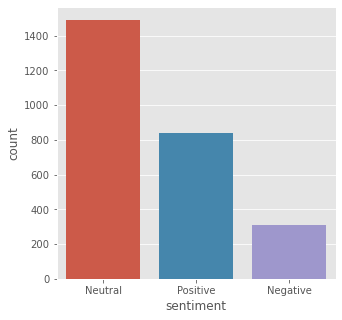

In [43]:
# Some visualisation to check counts
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data=Adidas_df)

Text(0.5, 1.0, 'Distribution of Adidas Sentiment')

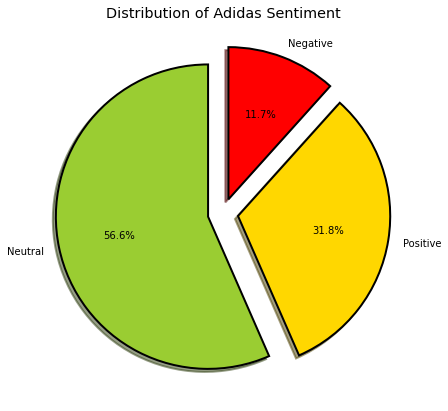

In [44]:
# Let's see each sentiment in a pie chart form.
fig = plt.figure(figsize=(7,7))
colors=("yellowgreen","gold","red")
wp={'linewidth':2, 'edgecolor':"black"}
tags=Adidas_df['sentiment'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90,wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Adidas Sentiment')

In [45]:
# It's time to seperete positive tweets from negative tweets

In [46]:
pos_tweets=Adidas_df[Adidas_df.sentiment=='Positive']
pos_tweets=pos_tweets.sort_values(['Polarity'], ascending=False)
pos_tweets.head()

author_id                    author_name      screen_name  \
471   1.305000e+18            giulia⁷ | THAT THAT         F1LTRMIN   
608   1.471160e+18  theofficialXO22 (Funkin'JamZ)         xo22DAWN   
2432  1.413310e+18                           Qwak         QwakLIVE   
1716  1.676738e+09                          giada    covnterfeiths   
3581  8.921440e+17                             Je  Pathetic_Paints   

                           location  followers_count  \
471   s-her | only bts͏⁷ and inter              3848   
608                             NaN               51   
2432                         he/him              360   
1716                      herondale             2484   
3581                       My mind               231   

                                                   text  retweet_count  \
471   listen btsbutter best sell song 2022 bt twt adida              0   
608                 ye plz x gon na da best collab sinc              1   
2432                       sorri best friend wear adida              0   
1716  someth best boy wear adida nick nelson isak va...             12   
3581              700 v3 might best adida yzi silhouett              0   

      Polarity sentiment  Text_length  Text_word_count  
471        1.0  Positive           49                9  
608        1.0  Positive           35                9  
2432       1.0  Positive           28                5  
1716       1.0  Positive           53                9  
3581       1.0  Positive           37                7

In [47]:
# Let's import Image lib to open a saved file.
## Note: I have downloaded "brain.png" in the jupiter directory to visualise the words in a more meaningful way.
# I will attach this brain.png file in my coursework submission. When this file is run, please add the brain.png first to get results.
from PIL import Image
mask=np.array(Image.open("adidas.png"))

In [48]:
# It's time to make wordclouds to analyse sentiments in a meaningful way.
# We will start it by using wordcloud library and then give it a form we want. I have chosen 500 at max to make words more 
# readable in the picture.
def create_wordcloud(text):
    mask=np.array(Image.open("adidas.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=750,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


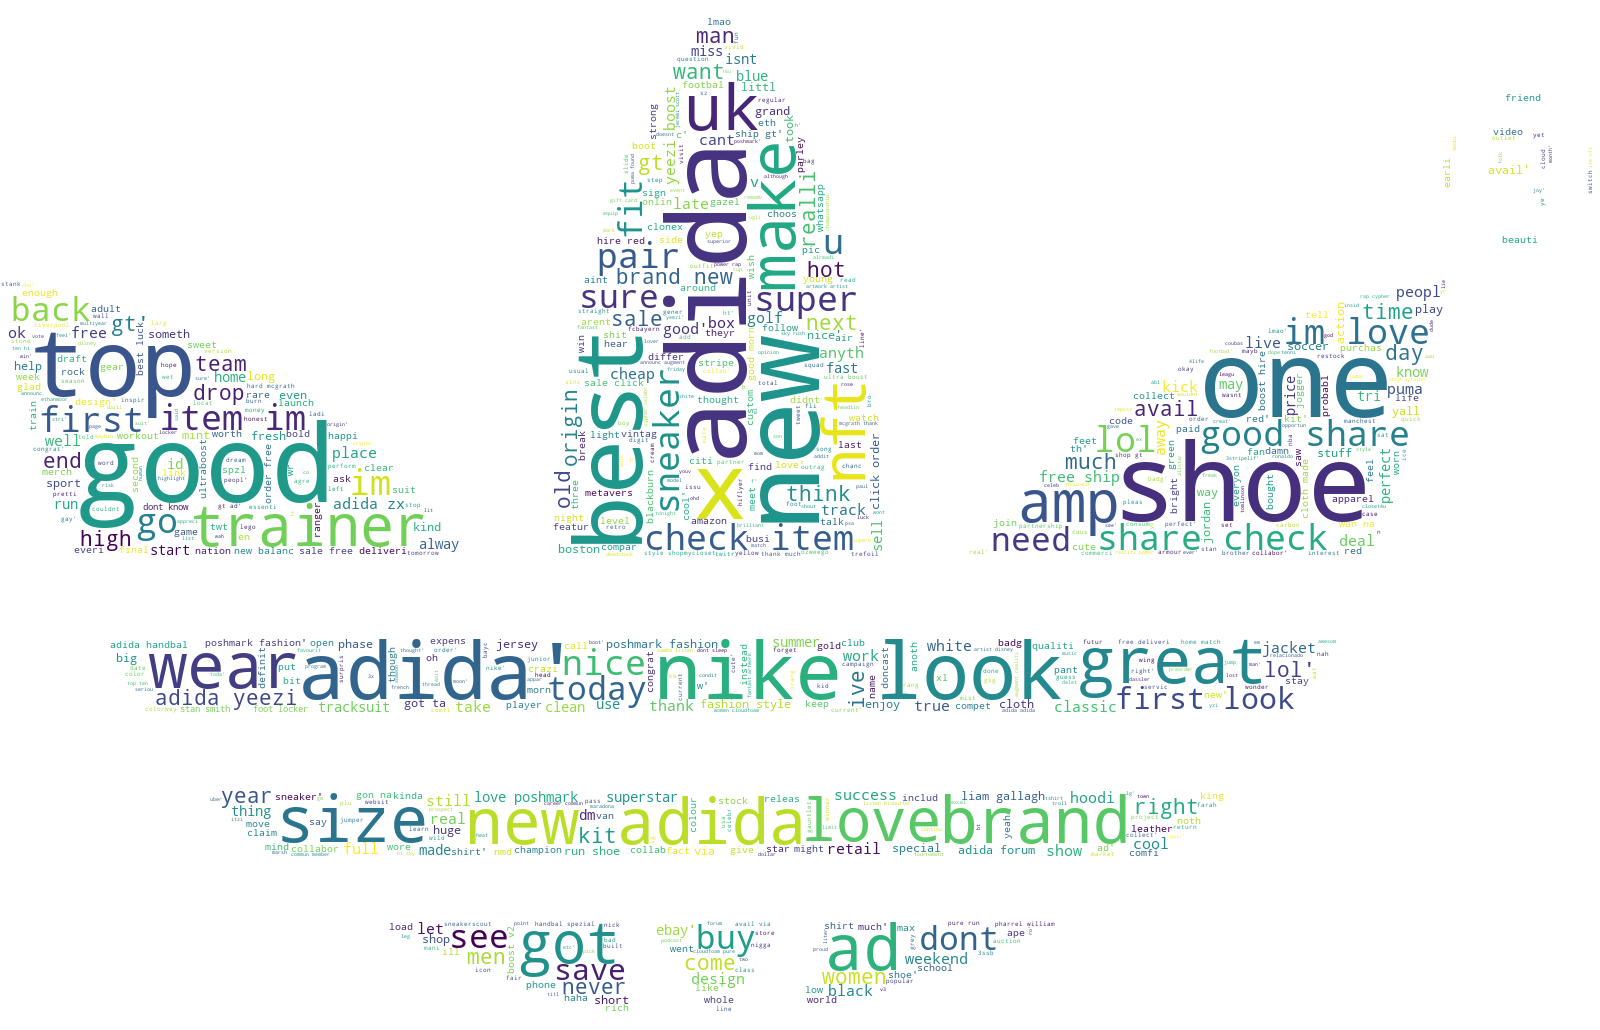

In [49]:
# Applying above function to get wordcloud of brain. It consists of positive tweets. Note, it gives the wrods which are most 
# repeating in the positive tweetrs. The higher the frequency of words,more visible as seem.
create_wordcloud(pos_tweets["text"].values)

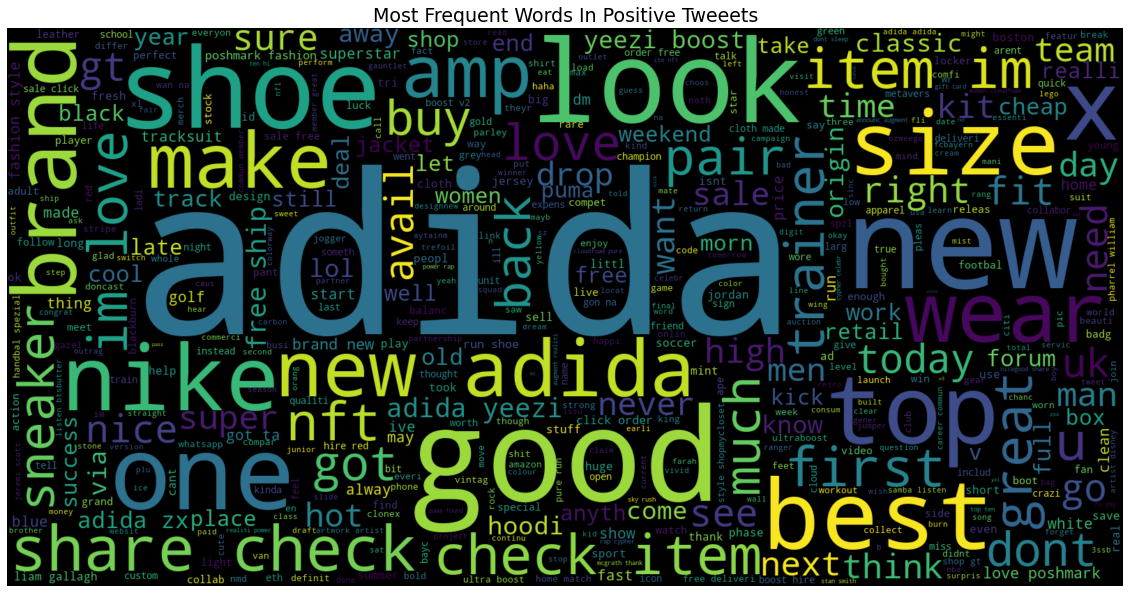

In [50]:
# I am adding two visualization to make it more interesing. 
text=''.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words In Positive Tweeets', fontsize=19)
plt.show()

In [51]:
# It's time to make wordclouds to analyse sentiments in a meaningful way.
# We will start it by using wordcloud library and then give it a form we want. I have chosen 500 at max to make words more 
# readable in the picture.
def create_wordcloud1(text):
    mask=np.array(Image.open("twitter2.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=500,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [52]:
# Let's check negative tweets by creating another data frame with negative tweets.
neg_tweets=Adidas_df[Adidas_df.sentiment=='Negative']
neg_tweets=neg_tweets.sort_values(['Polarity'], ascending=False)
neg_tweets.head()

author_id            author_name      screen_name  \
4891  2.513416e+09  The Casuals Directory    casualsdirect   
4898  1.364350e+18    Athletic Shoes Mens     MensAthletic   
3786  1.411448e+09       MoreSneakers.com    more_sneakers   
2000  3.583006e+09        shoedesignerbot  shoedesignerbot   
4972  5.593979e+08             Yeezy Mart        YeezyMart   

                       location  followers_count  \
4891   The Casuals Directory HQ            22839   
4898                        NaN               65   
3786  Paris, France / Worldwide            84726   
2000                        NaN               15   
4972                        NaN               16   

                                                   text  retweet_count  \
4891  ad adida zurro land adida zurro new red black ...              0   
4898  new unus adida sneaker nmdr1v2 black size us12...              0   
3786  ad adida x pharrel william humanrac sichona co...              0   
2000                                  new black adida 5              0   
4972  adida yeezi boost 750 tripl black kanyewest ka...              0   

      Polarity sentiment  Text_length  Text_word_count  
4891 -0.010101  Negative           54               11  
4898 -0.015152  Negative           62               11  
3786 -0.015152  Negative           86               15  
2000 -0.015152  Negative           17                4  
4972 -0.015152  Negative           99               17

Word Cloud Saved Successfully


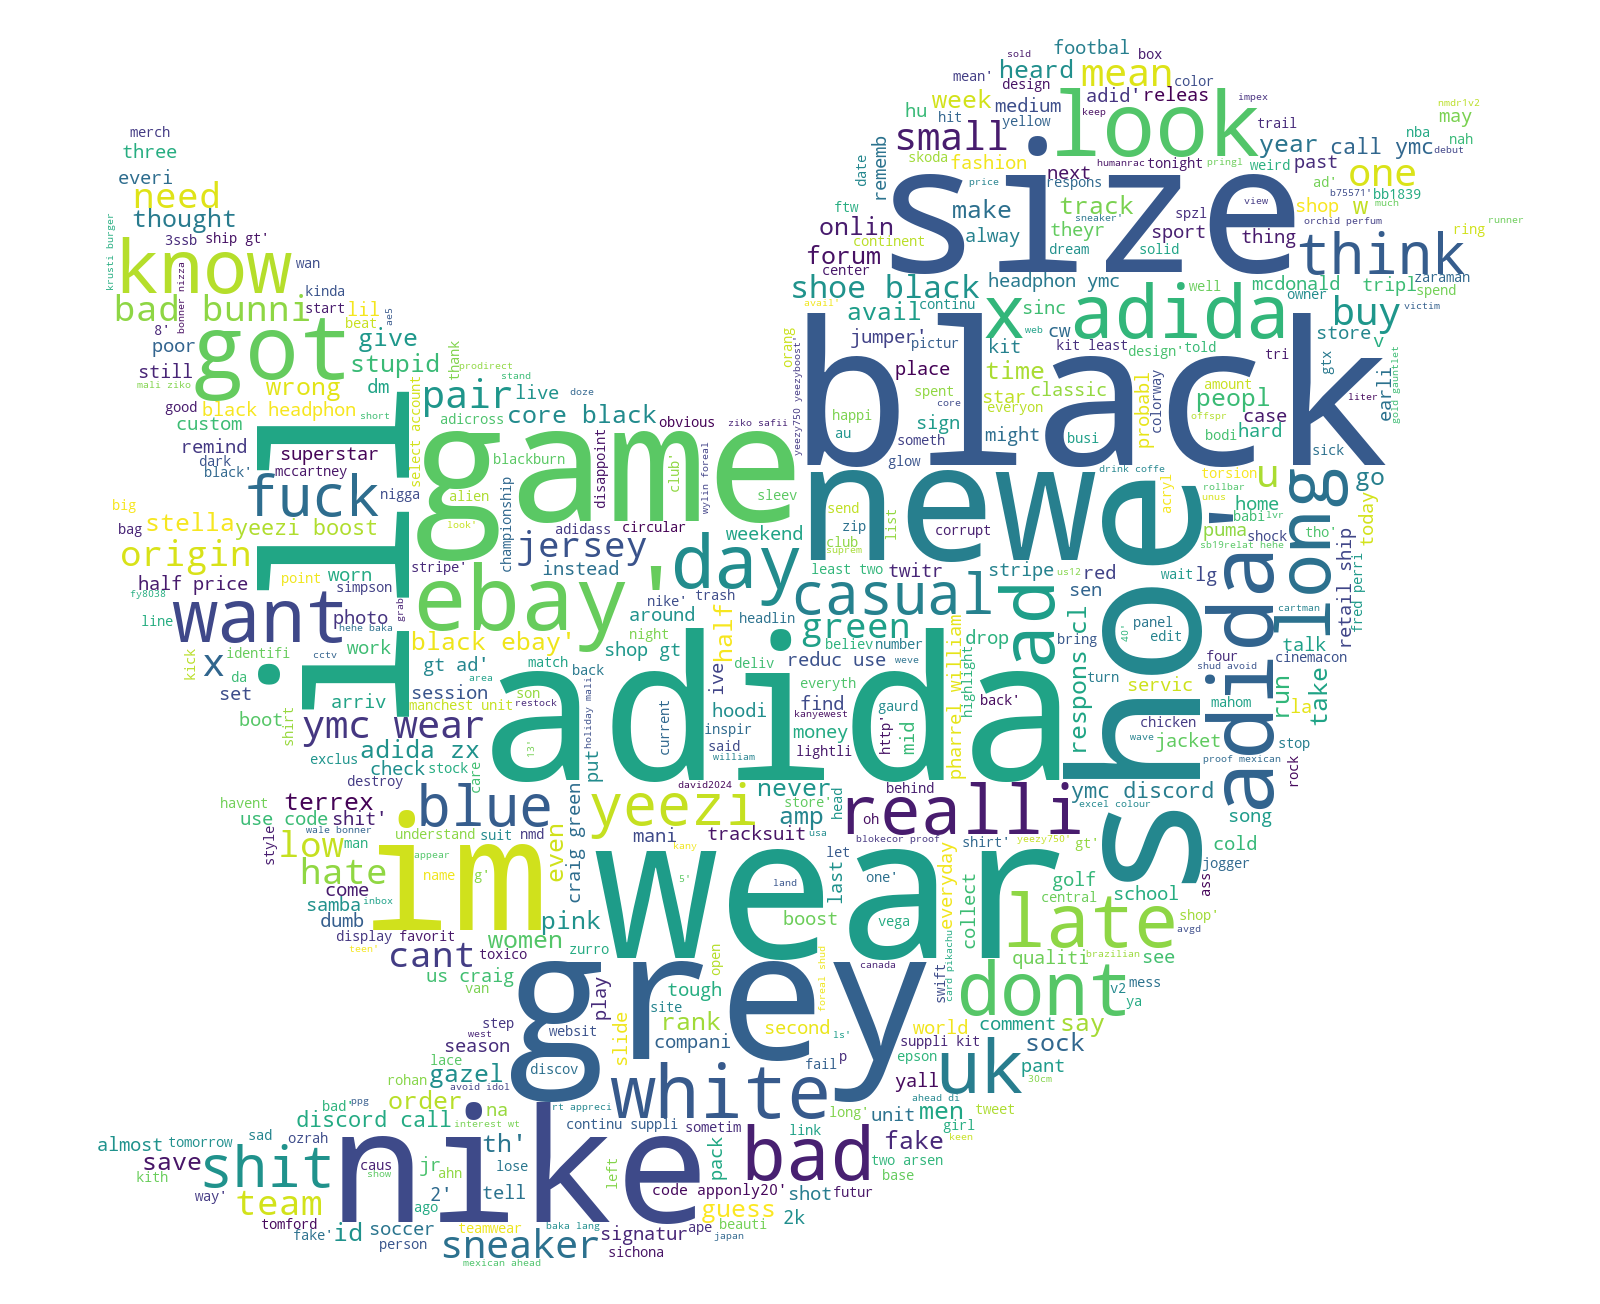

In [53]:
# Brain wordcloud of Negative Adidas tweets
create_wordcloud1(neg_tweets["text"].values)

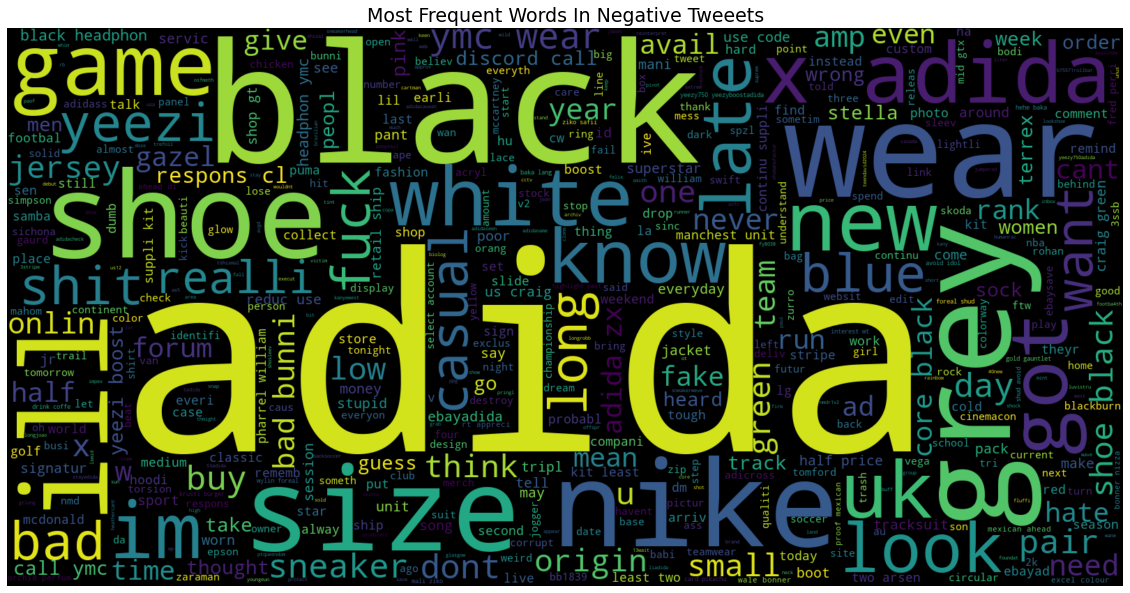

In [54]:
# Let's check another way of wordcloud to see 1000 common words. It may help in visualising more words.
text=''.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words In Negative Tweeets', fontsize=19)
plt.show()

In [55]:
# Let's find out about neutral texts as well. They help us in making appealing advertisement to indecisive customers.
neu_tweets=Adidas_df[Adidas_df.sentiment=='Neutral']
neu_tweets=neu_tweets.sort_values(['Polarity'], ascending=False)
neu_tweets.head()

author_id            author_name     screen_name  \
0     1.322300e+18                  Chris        Gattsu98   
3159  1.560355e+08             Kurt Burns      moparful99   
3177  2.513416e+09  The Casuals Directory   casualsdirect   
3176  5.557138e+07                Hibbett   hibbettsports   
3175  9.455220e+17            Max Schultz  MaxSchultz1975   

                            location  followers_count  \
0     Newcastle Upon Tyne, England.                87   
3159                         Mi casa               45   
3177        The Casuals Directory HQ            22839   
3176                             NaN            97460   
3175                   Frankfort, KY               36   

                                                   text  retweet_count  \
0     hope get nike adida tbh wonder aramco shirt ne...              0   
3159                 debeer94 bbn record basketbal prog              0   
3177          ad save 50 adida three stripe tee 2999 15              0   
3176  sporti leisur getoutsid springreadi obsess com...              1   
3175                               ethanmoor adida list              0   

      Polarity sentiment  Text_length  Text_word_count  
0          0.0   Neutral           60               11  
3159       0.0   Neutral           34                5  
3177       0.0   Neutral           41                9  
3176       0.0   Neutral           71                8  
3175       0.0   Neutral           20                3

In [56]:
# It's time to make wordclouds to analyse sentiments in a meaningful way.
# We will start it by using wordcloud library and then give it a form we want. I have chosen 500 at max to make words more 
# readable in the picture.
def create_wordcloud2(text):
    mask=np.array(Image.open("brain.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=500,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


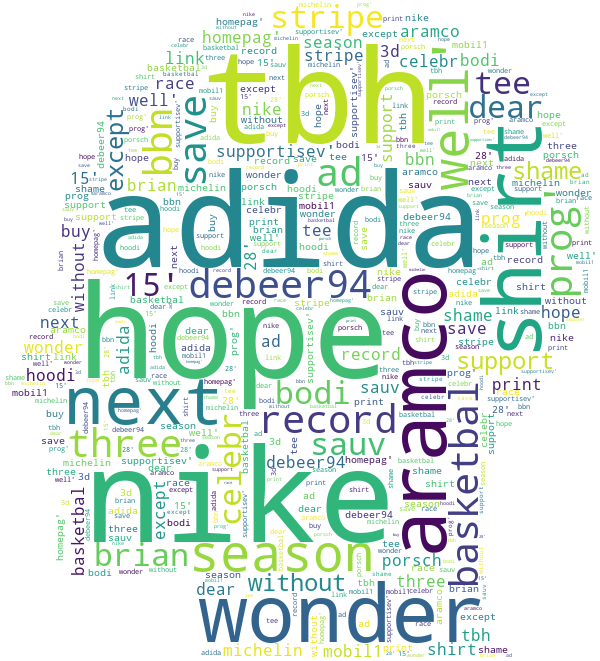

In [57]:
# Creating wordcloud of neutral texts
create_wordcloud2(neu_tweets["text"].values)

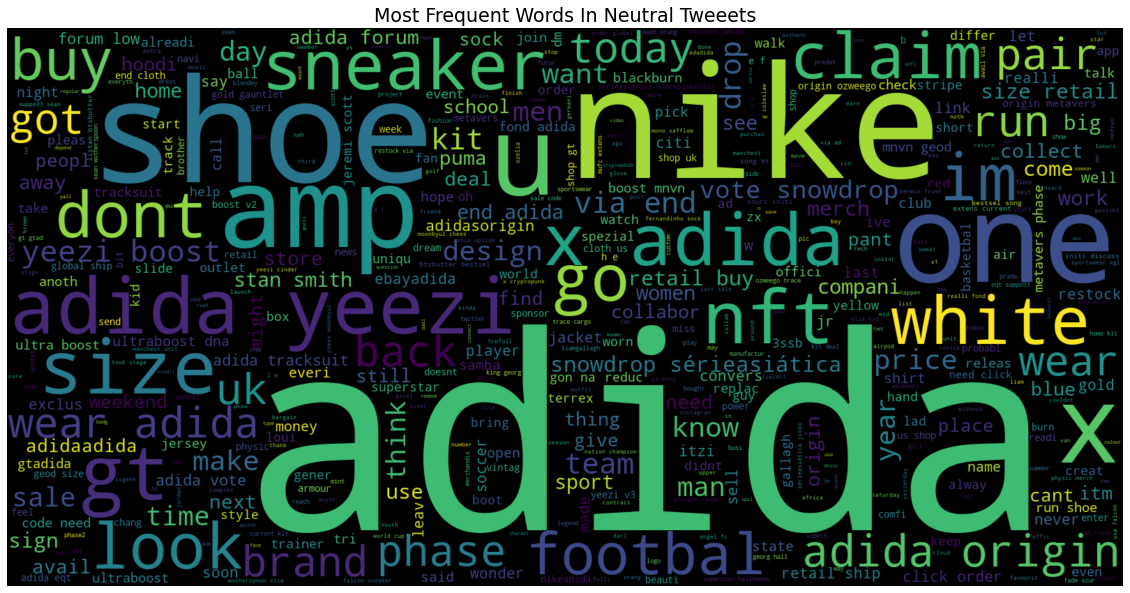

In [58]:
text=''.join([word for word in neu_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud=WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words In Neutral Tweeets', fontsize=19)
plt.show()

In [59]:
# Let's do Topic Anlaytics by counting how much times a word apprears.
tweet_corpus_pos=[]         
for msg in pos_tweets[(pos_tweets["sentiment"]=='Positive')]["text"].tolist():
    for word in msg.split():
        tweet_corpus_pos.append(word)
from collections import Counter
pd.DataFrame(Counter(tweet_corpus_pos).most_common(20),columns=["Words","Count"])

Words  Count
0   adida    548
1     new    120
2    good    106
3      im     63
4    love     62
5    shoe     60
6    like     58
7    look     52
8     one     47
9   brand     46
10    top     45
11   best     42
12    get     39
13   free     39
14     gt     38
15  first     38
16      x     37
17   nike     37
18     ad     36
19    got     32

C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


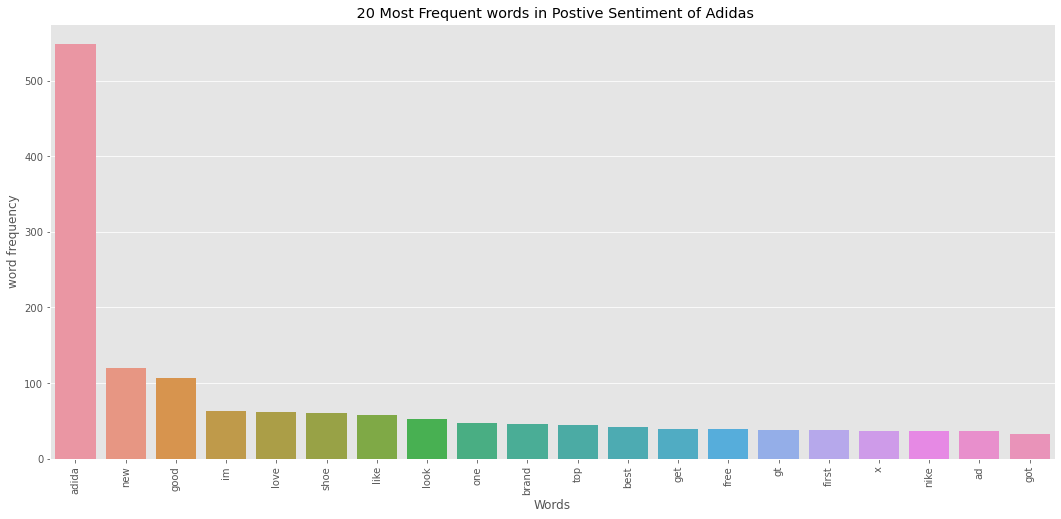

In [60]:
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_pos).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_pos).most_common(20))[1])
plt.xlabel("Words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.title(' 20 Most Frequent words in Postive Sentiment of Adidas')
plt.show()

In [61]:
# COUNT MOST NUMBER OF WORDS IN NEGATIVE SENTIMENTS
# Let's do Topic Anlaytics by counting how much times a word apprears.
tweet_corpus_neg=[]         
for msg in neg_tweets[(neg_tweets["sentiment"]=='Negative')]["text"].tolist():
    for word in msg.split():
        tweet_corpus_neg.append(word)
from collections import Counter
pd.DataFrame(Counter(tweet_corpus_neg).most_common(20),columns=["Words","Count"])

Words  Count
0   adida    232
1   black     55
2    wear     31
3    shoe     25
4       x     23
5    ebay     22
6     bad     22
7     ill     22
8    grey     20
9    like     19
10     ad     18
11   size     18
12   nike     18
13   game     17
14    ymc     16
15  yeezi     15
16   look     15
17     im     15
18      2     15
19    new     14

C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


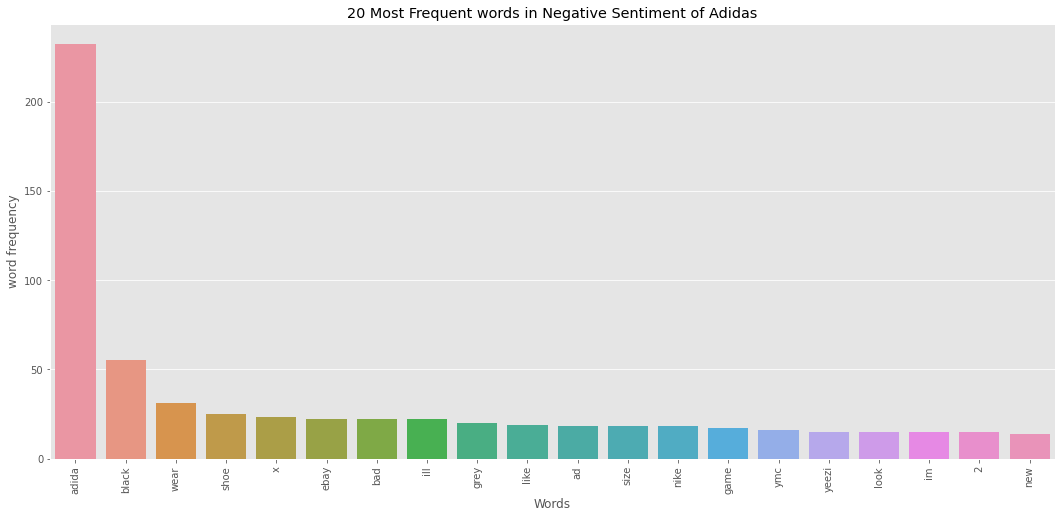

In [62]:
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_neg).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_neg).most_common(20))[1])
plt.xlabel("Words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.title('20 Most Frequent words in Negative Sentiment of Adidas')
plt.show()

In [63]:
# Let's do Topic Anlaytics by counting how much times a word apprears.
tweet_corpus_neu=[]         
for msg in neu_tweets[(neu_tweets["sentiment"]=='Neutral')]["text"].tolist():
    for word in msg.split():
        tweet_corpus_neu.append(word)
from collections import Counter
pd.DataFrame(Counter(tweet_corpus_neu).most_common(20),columns=["Words","Count"])

Words  Count
0     adida   1084
1      nike    117
2      shoe     94
3        gt     87
4         x     75
5      size     69
6       one     69
7      like     67
8        ad     63
9     yeezi     63
10      get     56
11   origin     56
12       uk     55
13      buy     52
14     wear     50
15      nft     47
16   retail     46
17        2     44
18      amp     42
19  sneaker     42

C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


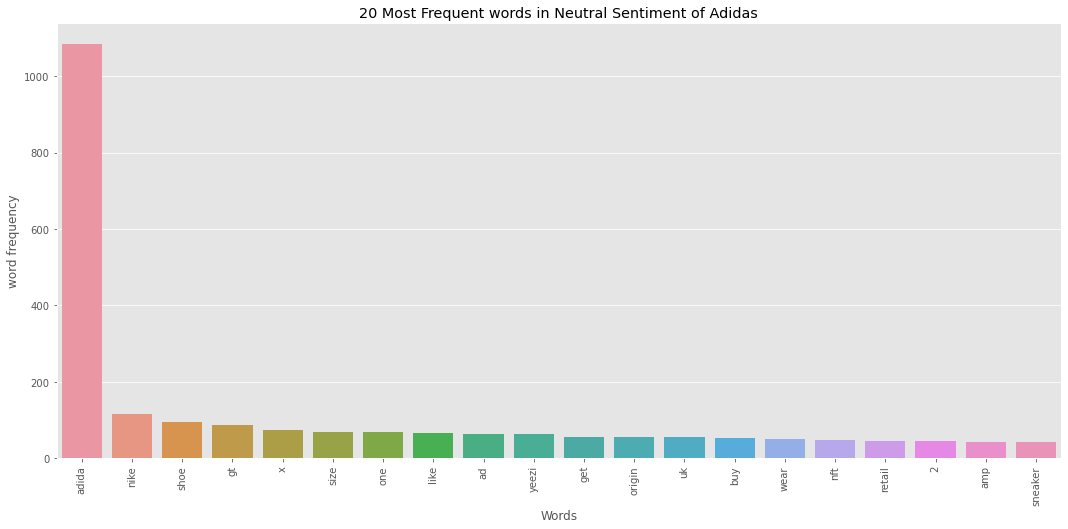

In [64]:
plt.figure(figsize=(18,8))
sns.barplot(pd.DataFrame(Counter(tweet_corpus_neu).most_common(20))[0],pd.DataFrame(Counter(tweet_corpus_neu).most_common(20))[1])
plt.xlabel("Words")
plt.ylabel("word frequency")
plt.xticks(rotation="vertical")
plt.title('20 Most Frequent words in Neutral Sentiment of Adidas')
plt.show()

In [65]:
# Let's see the ten largest influencers with higherst followers count
pos_tweets.nlargest(10,'followers_count')

author_id              author_name    screen_name       location  \
4588  1.839291e+07  The Business of Fashion            BoF         London   
3403  1.618087e+07             Sneaker News    SneakerNews            NYC   
4130  2.043436e+07           adidas Running  adidasrunning            NaN   
4125  2.043436e+07           adidas Running  adidasrunning            NaN   
4139  3.570637e+07                adidas UK       adidasUK             UK   
861   5.741869e+08               SNKR_TWITR     snkr_twitr  United States   
2855  5.741869e+08               SNKR_TWITR     snkr_twitr  United States   
1741  3.613290e+08              Kicks Deals     KicksDeals     World Wide   
1933  1.499442e+07            Jack Pattillo         jack_p     Austin, TX   
3114  1.703138e+09              KicksFinder    KicksFinder            NaN   

      followers_count                                               text  \
4588          1852621  year puma lack distinct ident puma found succe...   
3403          1161842  debut new adida respons cl collabor cinemacon ...   
4130           992841  senber teferi 5km strange success adida hq win...   
4125           992841  sheila chepkirui 10km make wave junior sheila ...   
4139           823805  hi zoe that good hear custom servic team happi...   
861            478711  adida top ten hi sky rush size 8 105 dtlr shop...   
2855           478317        new adida ozelia crimson redmaiv shop gt ad   
1741           473052  size 13 x adida zx 9000 boston marathon releas...   
1933           416257         ka grab awesomo launch comfi hell main rea   
3114           395477  ad retail via adida us yctn x adida zx 9000 11...   

      retweet_count  Polarity sentiment  Text_length  Text_word_count  
4588              4  0.300000  Positive           77               12  
3403              0  0.136364  Positive           57                9  
4130              0  0.350000  Positive           64               11  
4125              0  0.100000  Positive           74               12  
4139              0  0.700000  Positive           65               12  
861               0  0.250000  Positive           52               13  
2855              0  0.136364  Positive           43                8  
1741              0  0.400000  Positive           64               13  
1933              0  0.166667  Positive           42                8  
3114              0  0.400000  Positive           80               17

In [66]:
# Micro influencers have less than 100,000 followers.
top_micro_influencers=pos_tweets.loc[pos_tweets['followers_count']<100000,['author_id','author_name','screen_name',"followers_count",'location']]

In [67]:
#Top 20 from micro_influencers
top_micro_influencers.nlargest(20,'followers_count')

author_id          author_name      screen_name  followers_count  \
1930  4.413183e+07          Man Savings      man_savings            96691   
4164  4.413183e+07          Man Savings      man_savings            96664   
2831  4.413183e+07          Man Savings      man_savings            96663   
3233  2.173374e+08   Chollos imposibles        ofertitas            96575   
3904  7.405128e+07       Chris Blattman          cblatts            85067   
278   3.255034e+09     Wirecutter Deals  WirecutterDeals            78333   
5060  4.196267e+09          Optus Sport       OptusSport            76746   
424   8.410564e+07     Benit0 RTFKT 👁‍🗨    benitopagotto            71680   
843   2.337186e+09     deadstock_utopia  DeadstockUtopia            66272   
3919  8.189680e+17       The Sole Style     thesolestyle            59055   
3113  2.422966e+08             YOMZANSI         YOMZANSI            58432   
2906  2.784716e+07       Music-News.com     MusicNewsWeb            57683   
4210  1.220620e+18       The Sole Sales     thesolesales            56170   
530   1.220620e+18       The Sole Sales     thesolesales            56162   
15    1.132330e+09         Sneaker Myth      sneakermyth            53194   
3886  2.261515e+07           FOOTASYLUM       Footasylum            53125   
4408  2.564777e+08  80s Casual Classics   casualclassics            52312   
2719  2.365539e+09   Retro Footy Shirts      Style4youUK            51352   
2622  2.365539e+09   Retro Footy Shirts      Style4youUK            51352   
254   4.851462e+09   Kicks Deals Canada     KicksDealsCA            48034   

             location  
1930              NaN  
4164              NaN  
2831              NaN  
3233           España  
3904      Chicago, IL  
278               NaN  
5060        Australia  
424             Paris  
843               NaN  
3919  London, England  
3113     South Africa  
2906           London  
4210           London  
530            London  
15             London  
3886               UK  
4408      Bedford, UK  
2719               UK  
2622               UK  
254            CANADA

In [68]:
vect=CountVectorizer(ngram_range=(1,2)).fit(Adidas_df['text'])

In [69]:
feature_names = vect.get_feature_names()
print('Number of features:{}\n'.format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))

Number of features:20982

First 20 features:
['0005', '0005 0007', '0007', '0007 openseanft', '0007 start', '011', '011 adida', '011700', '011700 eu', '021', '021 uk', '0245529128', '0245529128 order', '0269560634', '0269560634 place', '032c', '032c adida', '04', '04 third', '0505']


C:\Users\balaj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
X=Adidas_df['text']
y=Adidas_df['sentiment']
X=vect.transform(X)

In [71]:
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [72]:
print('size of x_train:', (x_train.shape))
print('size of y_train:', (y_train.shape))
print('size of x_test:', (x_test.shape))
print('size of x_test:', (x_test.shape))

size of x_train: (2107, 20982)
size of y_train: (2107,)
size of x_test: (527, 20982)
size of x_test: (527, 20982)


In [73]:
logreg=LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred=logreg.predict(x_test)
logreg_acc=accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.20%


In [74]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 16  30   3]
 [  0 310   2]
 [  0  43 123]]


              precision    recall  f1-score   support

    Negative       1.00      0.33      0.49        49
     Neutral       0.81      0.99      0.89       312
    Positive       0.96      0.74      0.84       166

    accuracy                           0.85       527
   macro avg       0.92      0.69      0.74       527
weighted avg       0.87      0.85      0.84       527



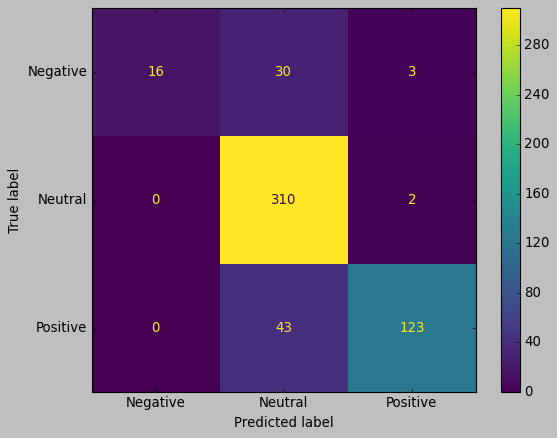

In [75]:
style.use('classic')
cm=confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [76]:
# LET'S apply different methods to perform hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid =GridSearchCV(LogisticRegression(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [77]:
print("Best Parameters:",grid.best_params_)

Best Parameters: {'C': 10}


In [78]:
y_pred=grid.predict(x_test)

In [79]:
logreg_acc=accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.15%


In [80]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 20  26   3]
 [  0 310   2]
 [  0  42 124]]


              precision    recall  f1-score   support

    Negative       1.00      0.41      0.58        49
     Neutral       0.82      0.99      0.90       312
    Positive       0.96      0.75      0.84       166

    accuracy                           0.86       527
   macro avg       0.93      0.72      0.77       527
weighted avg       0.88      0.86      0.85       527



In [81]:
from sklearn.svm import LinearSVC

In [82]:
SVCmodel=LinearSVC()
SVCmodel.fit(x_train,y_train)

LinearSVC()

In [83]:
svc_pred=SVCmodel.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("Test Accuracy: {:.2f}%".format(svc_acc*100))

Test Accuracy: 87.86%


In [84]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[ 25  22   2]
 [  1 310   1]
 [  1  37 128]]


              precision    recall  f1-score   support

    Negative       0.93      0.51      0.66        49
     Neutral       0.84      0.99      0.91       312
    Positive       0.98      0.77      0.86       166

    accuracy                           0.88       527
   macro avg       0.91      0.76      0.81       527
weighted avg       0.89      0.88      0.87       527



In [85]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

C:\Users\balaj\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [86]:
print("Best Parameter:", grid.best_params_)

Best Parameter: {'C': 1}


In [87]:
y_pred=grid.predict(x_test)

In [88]:
logreg_acc=accuracy_score(y_pred,y_test)
print('Test accuracy: {:.2f}%'.format(logreg_acc*100))

Test accuracy: 87.86%


In [89]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test,y_pred))


[[ 25  22   2]
 [  1 310   1]
 [  1  37 128]]


              precision    recall  f1-score   support

    Negative       0.93      0.51      0.66        49
     Neutral       0.84      0.99      0.91       312
    Positive       0.98      0.77      0.86       166

    accuracy                           0.88       527
   macro avg       0.91      0.76      0.81       527
weighted avg       0.89      0.88      0.87       527

